In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
plt.style.use(["science","grid"])

In [5]:
data1 = pd.read_feather("rerouting30_beta1.0")
data2 = pd.read_feather("rerouting30_beta0.0")

input_vars1 = pd.read_csv("input_parameters_rerouting30_beta1.0.csv")
input_vars2 = pd.read_csv("input_parameters_rerouting30_beta0.0.csv")

data2.o0 = data2.o0+(len(input_vars1))

data = pd.concat([data1,data2]).reset_index()
input_vars = pd.concat([input_vars1,input_vars2]).reset_index()

In [6]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm
def ticks_labels(nb_days):
    if 30%nb_days != 0:
        raise ValueError 
    else:
        vec = np.linspace(0,4320,int(30/nb_days)+1)
        labs = list()
        for i in range(int(30/nb_days)+1):
            labs.append("Day %s"%(i*nb_days))
        return vec,labs

my_palette = {}
my_palette['dark'] = ['midnightblue', 'chocolate', 'darkolivegreen']
my_palette['light'] = ['cornflowerblue','orange','yellowgreen']
my_palette['reds'] = []

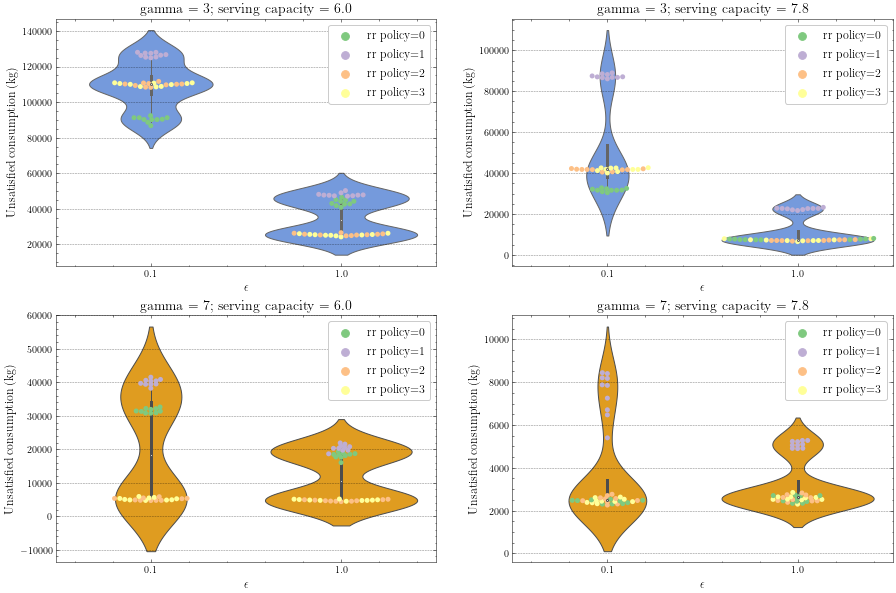

In [11]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()

for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o1[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]        

    
gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):    
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]
    for g in range(len(gammas)):
        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
       
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]),fontsize=14)
                
        ax[g,s].set_ylabel("Unsatisfied consumption (kg)",fontsize=12)
        ax[g,s].set_xlabel(r"$\epsilon$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='upper right',fontsize=12)
plt.savefig("/home/daan/Desktop/uc_rerouting30_epsilon_full.png")

REPORT PLOT: Cumulative unsatisfied consumption TWO selected


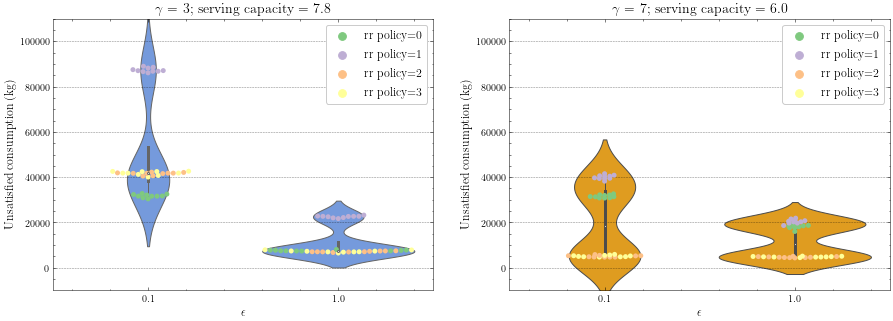

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-10e3,110e3])
    ax[i].set_ylabel("Unsatisfied consumption (kg)",fontsize=12);
    
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_xlabel(r"$\epsilon$",fontsize=12)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='upper right',fontsize=12)    
print("REPORT PLOT: Cumulative unsatisfied consumption TWO selected")
plt.savefig("/home/daan/Desktop/uc_rerouting30_epsilon_report.png")

## Food waste

/home/daan/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


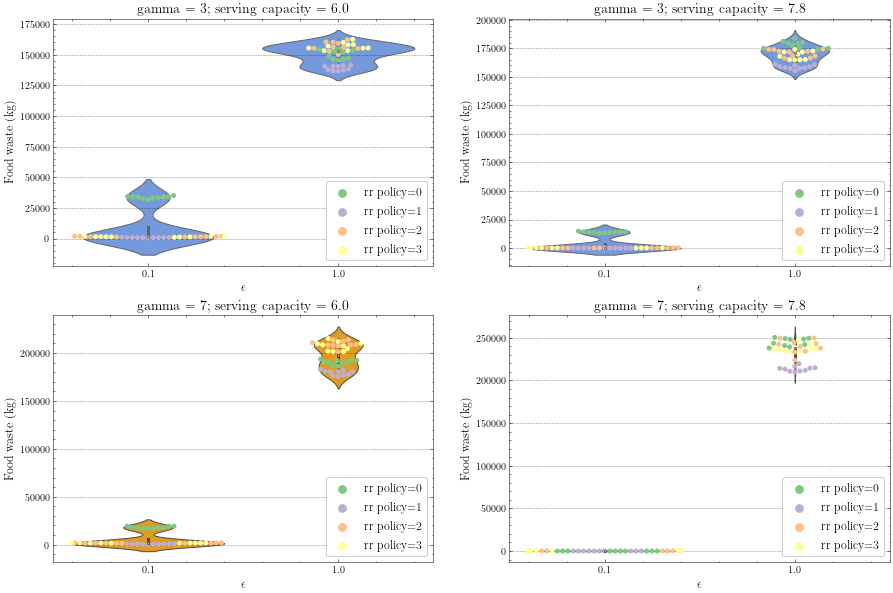

In [13]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
uc_endvals_dict = {}
uc_endvals_dict["unsatisfied consumption"] = list()

for j in input_vars.index:
    uc_endvals_dict["unsatisfied consumption"].append(data.o2[data.o0==j].iloc[-1])
uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]        

    
gammas = [3,7]
scs = [6.0,7.8]

for s in range(len(scs)):    
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]
    for g in range(len(gammas)):
        tmp2 = tmp1[tmp1.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][g])
       
        ax[g,s].set_title("gamma = %s; serving capacity = %s"%(gammas[g],scs[s]),fontsize=14)
                
        ax[g,s].set_ylabel("Food waste (kg)",fontsize=12)
        ax[g,s].set_xlabel(r"$\epsilon$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='lower right',fontsize=12)
plt.savefig("/home/daan/Desktop/fw_rerouting30_epsilon_full.png")

REPORT PLOT: Food waste TWO selected


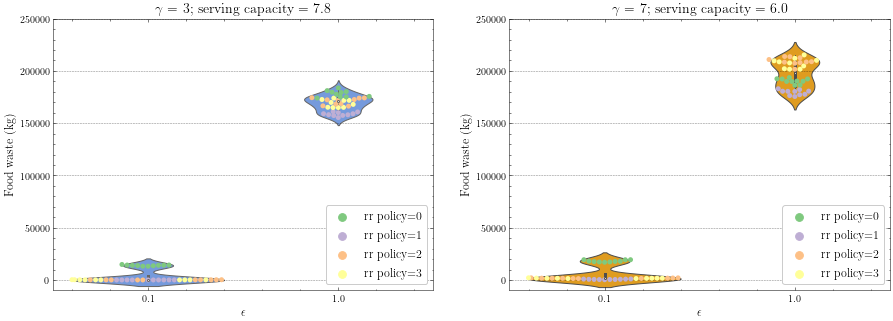

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="unsatisfied consumption", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="unsatisfied consumption", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-10e3,250e3])
    ax[i].set_ylabel("Food waste (kg)",fontsize=12);
    
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_xlabel(r"$\epsilon$",fontsize=12)
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc='lower right',fontsize=12)    
print("REPORT PLOT: Food waste TWO selected")
plt.savefig("/home/daan/Desktop/fw_rerouting30_epsilon_report.png")

## Queuing

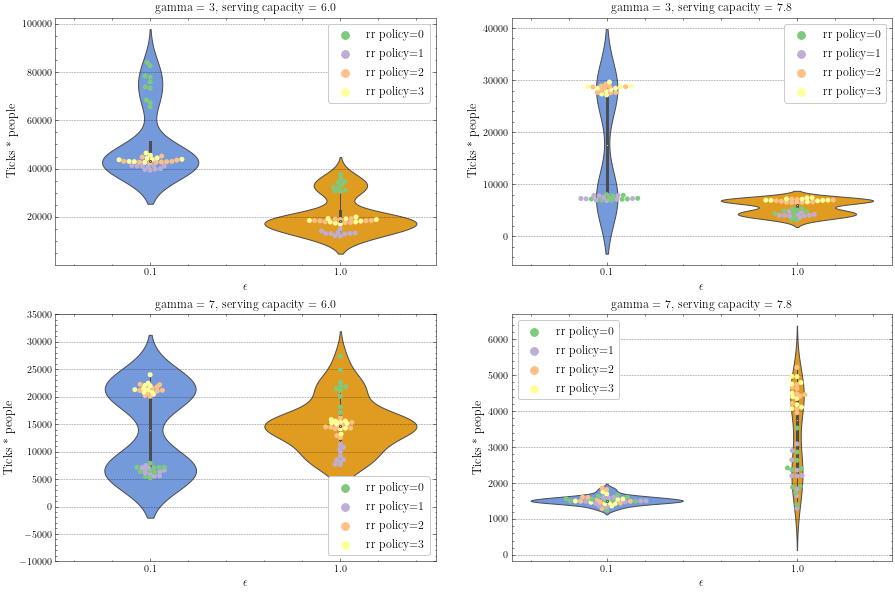

In [19]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()

for j in input_vars.index:
    uc_endvals_dict["ticks*people"].append( np.sum(data[data.o0==j].iloc[:,9]))

uc_endvals_df = pd.DataFrame(uc_endvals_dict)
input_vars_filtered = pd.concat([input_vars.reset_index(),uc_endvals_df],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]  

gammas = [3,7]
scs = [6.0,7.8]
positions = [list(),list()]
positions[0].append('upper right')
positions[0].append('upper right')
positions[1].append('lower right')
positions[1].append('upper left')
for s in range(len(scs)):
    
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]),fontsize=12)
        
        ax[g,s].set_ylabel("Ticks * people",fontsize=12);
        ax[g,s].set_xlabel(r"$\epsilon$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[g][s],fontsize=12)    
ax[1,0].set_ylim([-10e3,35e3]);

REPORT PLOT: Cumulative queuing time for busiest facility #5, TWO selected


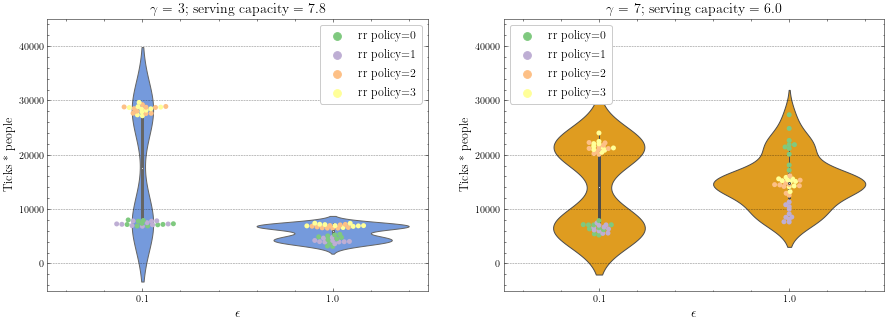

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

gs = [  [3 , 7.8] ,[7 , 6.0] ]

t={}
t[3]=0
t[7]=1
positions=['upper right','upper left']
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="ticks*people", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-5e3,45e3])
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\epsilon$",fontsize=14,fontweight='bold')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[i],fontsize=12)    
print("REPORT PLOT: Cumulative queuing time for busiest facility #5, TWO selected")

## Queuing 2

In [21]:
q_sum = list()
n_facs = 12
for j in input_vars.index:
#     uc_endvals_dict["u_con (norm)"].append(data_batch2.o2[data_batch2.o0==j].iloc[-1])
    tmp_sum = 0
    for i in range(n_facs):
        tmp_sum += ( np.sum(data[data.o0==j].iloc[:,i+4]))  
    
    q_sum.append(tmp_sum)    

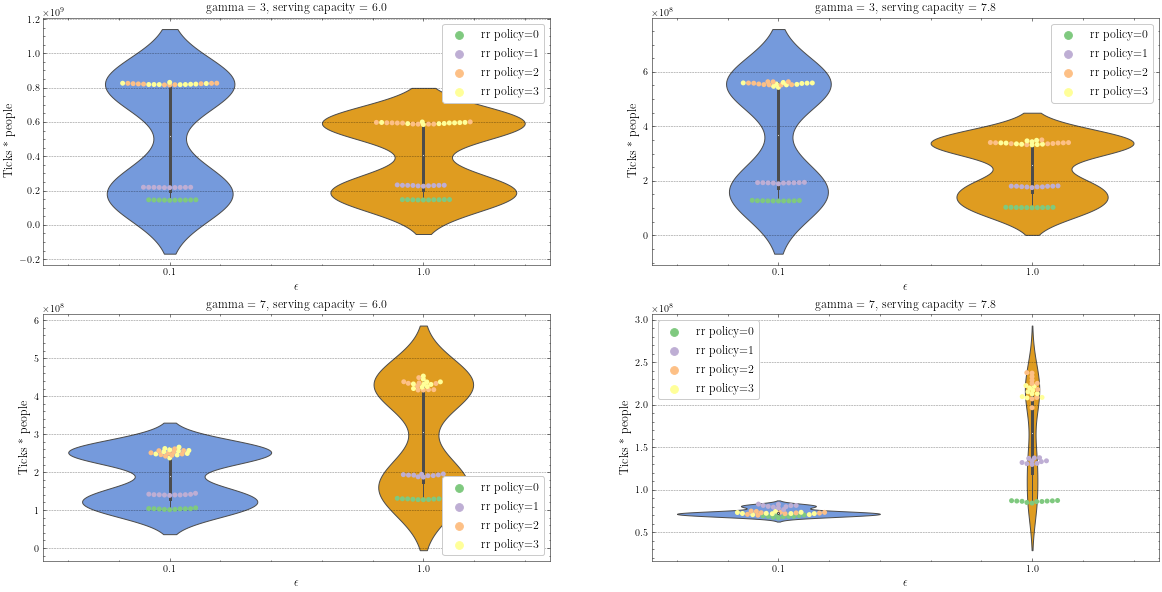

In [22]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

uc_endvals_dict = {}
uc_endvals_dict["ticks*people"] = list()
for j in range(len(input_vars)):
    uc_endvals_dict["ticks*people"].append( q_sum[j] )

input_vars_filtered = pd.concat([input_vars.reset_index(),pd.DataFrame(uc_endvals_dict)],axis=1)
input_vars_filtered = input_vars_filtered[input_vars_filtered.beta==1.0]        
input_vars_filtered = input_vars_filtered[input_vars_filtered.ration_size_policy==30]  

gammas = [3,7]
scs = [6.0,7.8]
positions = [list(),list()]
positions[0].append('upper right')
positions[0].append('upper right')
positions[1].append('lower right')
positions[1].append('upper left')
for s in range(len(scs)):
    
    tmp = input_vars_filtered[input_vars_filtered.parallel_served_full==scs[s]]

    for g in range(len(gammas)):

        tmp2 = tmp[tmp.gamma==gammas[g]]
        sns.swarmplot(ax=ax[g,s] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
        sns.violinplot(ax=ax[g,s], x="epsilon", y="ticks*people", data=tmp2,palette=my_palette['light'])
        
        ax[g,s].set_title('gamma = %s, serving capacity = %s'%(gammas[g],scs[s]),fontsize=12)
        
        ax[g,s].set_ylabel("Ticks * people",fontsize=12);
        ax[g,s].set_xlabel(r"$\epsilon$",fontsize=12)
        handles, labels = ax[g,s].get_legend_handles_labels()
        ax[g,s].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[g][s],fontsize=12)    


REPORT PLOT: Cumulative queuing of all facilities summed, TWO selected


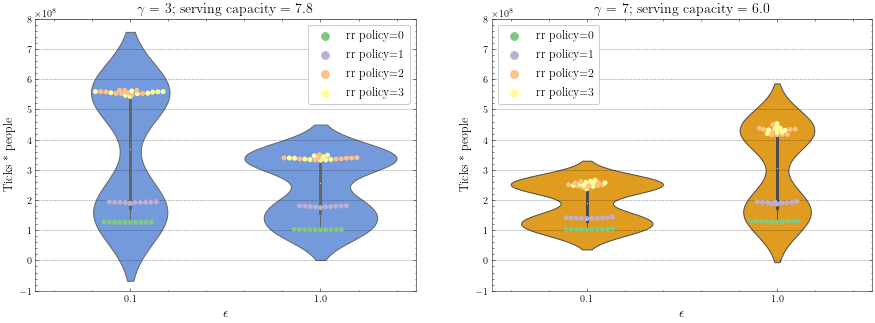

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

positions=['upper right','upper left']
for i in range(len(gs)):
    tmp1 = input_vars_filtered[input_vars_filtered.parallel_served_full==gs[i][1]]
    tmp2 = tmp1[tmp1.gamma==gs[i][0]]

    sns.swarmplot(ax=ax[i] ,x="epsilon", y="ticks*people", data=tmp2,hue='rerouting_policy',palette='Accent')#palette=my_palette['dark'])
    sns.violinplot(ax=ax[i], x="epsilon", y="ticks*people", data=tmp2,color=my_palette['light'][t[gs[i][0]]])
    ax[i].set_ylim([-1e8,8e8])
    ax[i].set_title(r"$\gamma$ = %s; serving capacity = %s"%(gs[i][0],gs[i][1]),fontsize=14)
    ax[i].set_ylabel("Ticks * people",fontsize=12)
    ax[i].set_xlabel(r"$\epsilon$",fontsize=14,fontweight='bold')
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:4], [r"rr policy=0",r"rr policy=1",r"rr policy=2",r"rr policy=3"],loc=positions[i],fontsize=12)    
print("REPORT PLOT: Cumulative queuing of all facilities summed, TWO selected")